/home/rahuls/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:78: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


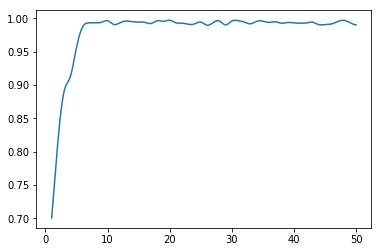

In [323]:
from bayes_opt import BayesianOptimization
import numpy as np

from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from scipy.interpolate import spline
import csv
import random
import math
import operator

def load_dataset(f_name,split, train_set=[], test_set=[]):
    with open(f_name, newline='') as csvfile:
        lines = csv.reader(csvfile, delimiter=',', quotechar='|')
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(24):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                train_set.append(dataset[x])
            else:
                test_set.append(dataset[x])

def clr(x):
    y = []
    for i in x:
        c = 0
        for j in i:
            c += 1
            if c == 25:
                y.append(j)
                i.remove(j)
                
    return y,x

def acc(test_label, prediction):
    c=0
    for x in range(len(test_label)):
        if test_label[x] == prediction[x]:
            c += 1

    accuracy = c/(float(len(test_label)))
    return accuracy


def decisionTree(n):
    prediction = []
    train_set = []
    test_set = []
    split = 0.67
    train_label = []
    test_label = []
    load_dataset('sensor_readings_24.csv', split, train_set,test_set)
    train_label, train_set = clr(train_set)
    test_label, test_set = clr (test_set)
    clf = tree.DecisionTreeClassifier(max_depth=n)
    clf.fit(train_set,train_label)
    prediction = clf.predict(test_set)
    
    accuracy = acc(test_label, prediction)
    return accuracy
    

    
    
x=[]
y=[]
for i in range(1,51):
    x.append(i)
    y.append(decisionTree(i))

m = np.array(x)
n = np.array(y)

x_smooth = np.linspace(m.min(),m.max(),300).reshape(-1,1)
y_smooth = spline(m,n,x_smooth)
plt.plot(x_smooth,y_smooth)



In [307]:
bo = BayesianOptimization(decisionTree,{'n':(1,50)})
bo.maximize(init_points=2, n_iter=0, acq='ei')

Initialization
-----------------------------------------
 Step |   Time |      Value |         n | 
    1 | 00m00s |    0.99780 |   29.0873 | 
    2 | 00m00s |    0.99507 |   30.1476 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 


In [308]:
def posterior(bo, x, xmin=1, xmax=10):
    xmin, xmax = 1, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((1, 50))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((1, 50))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    
    


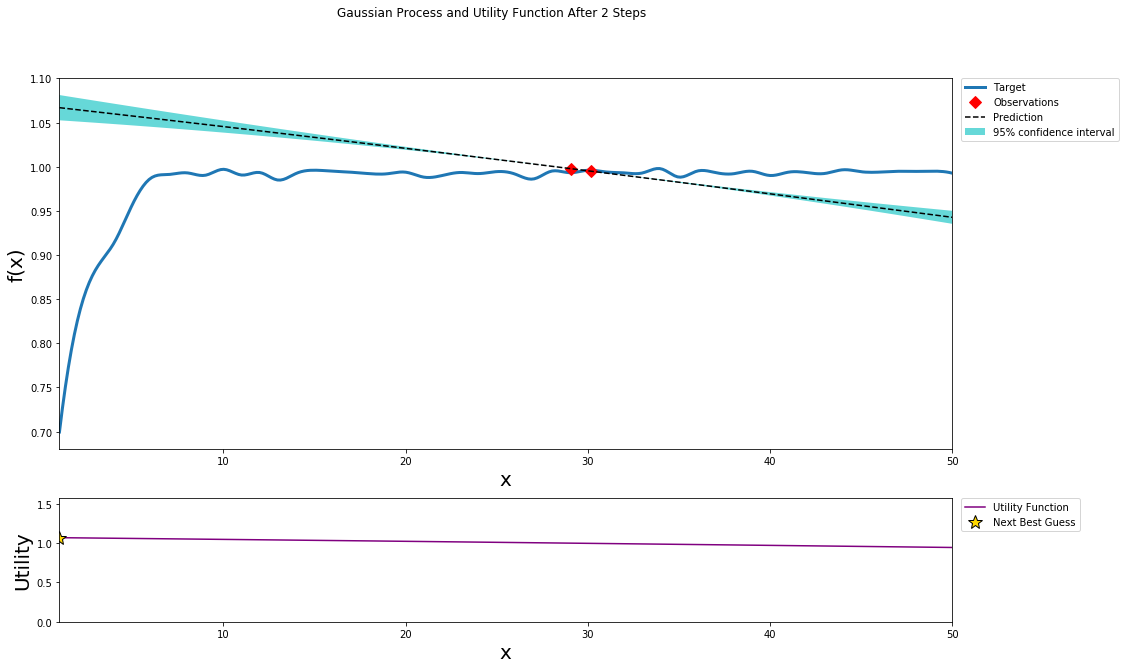

In [309]:
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
    3 | 00m06s |    0.70726 |    1.0000 | 


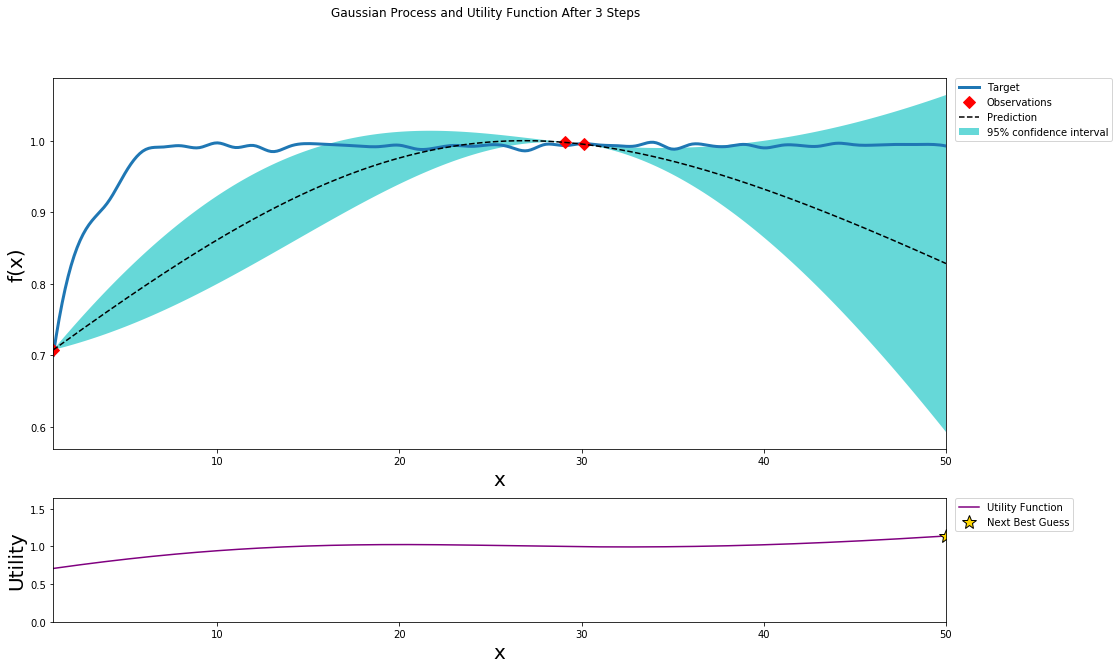

In [310]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
    4 | 00m04s |    0.98897 |   50.0000 | 


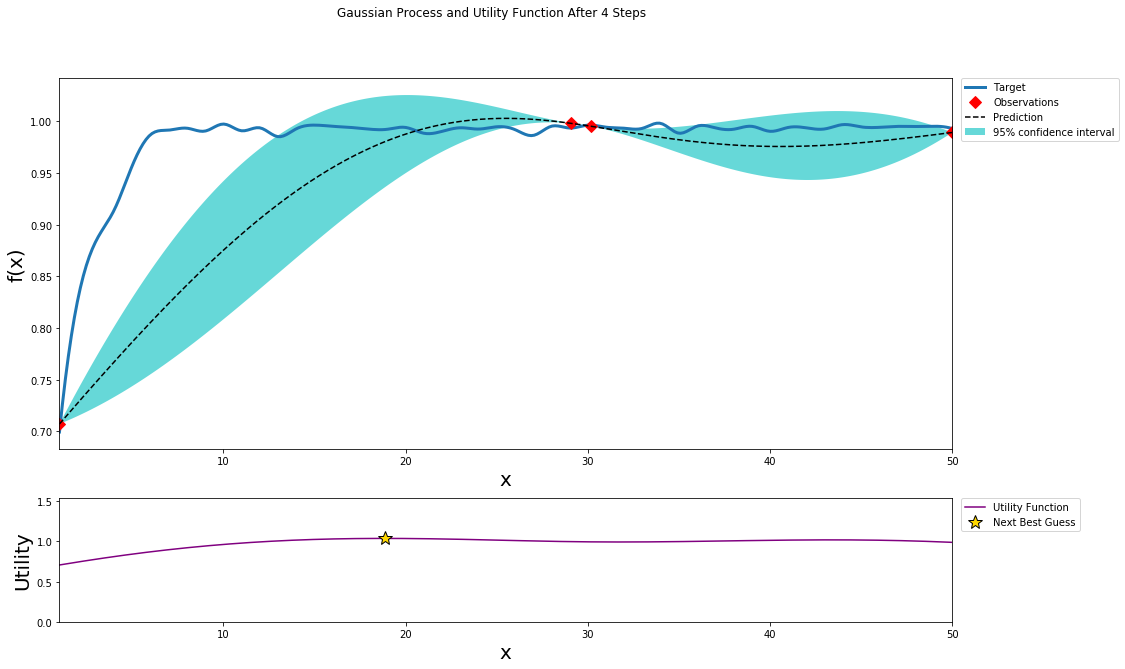

In [311]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
    5 | 00m05s |    0.99599 |   18.8171 | 


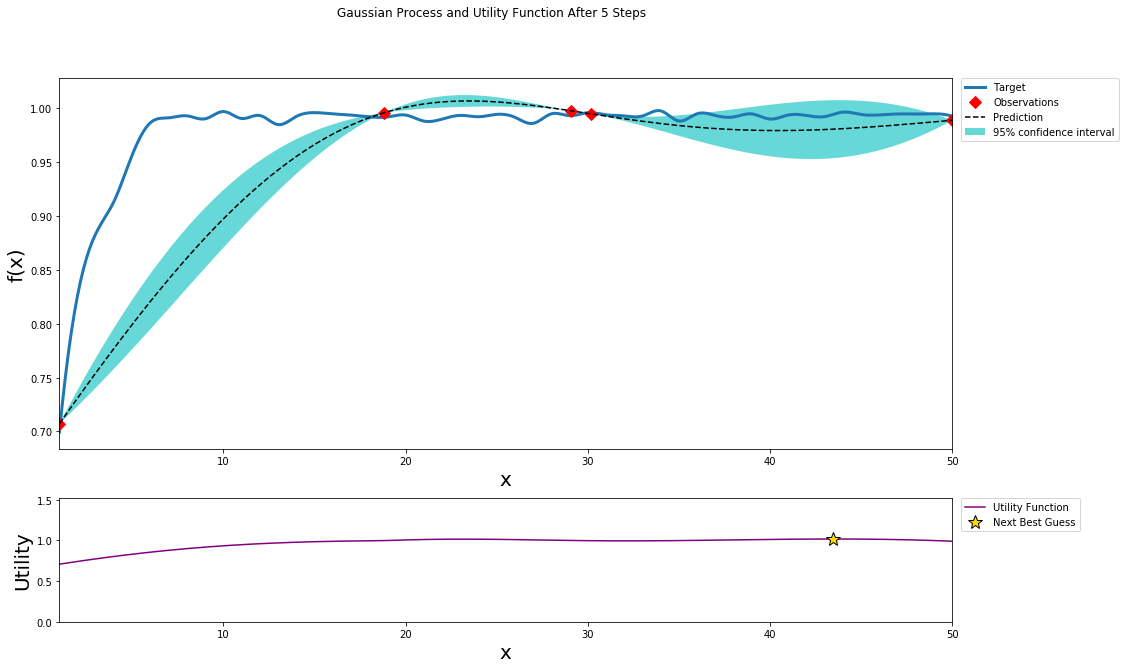

In [312]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
    6 | 00m07s |    0.99168 |   43.4997 | 


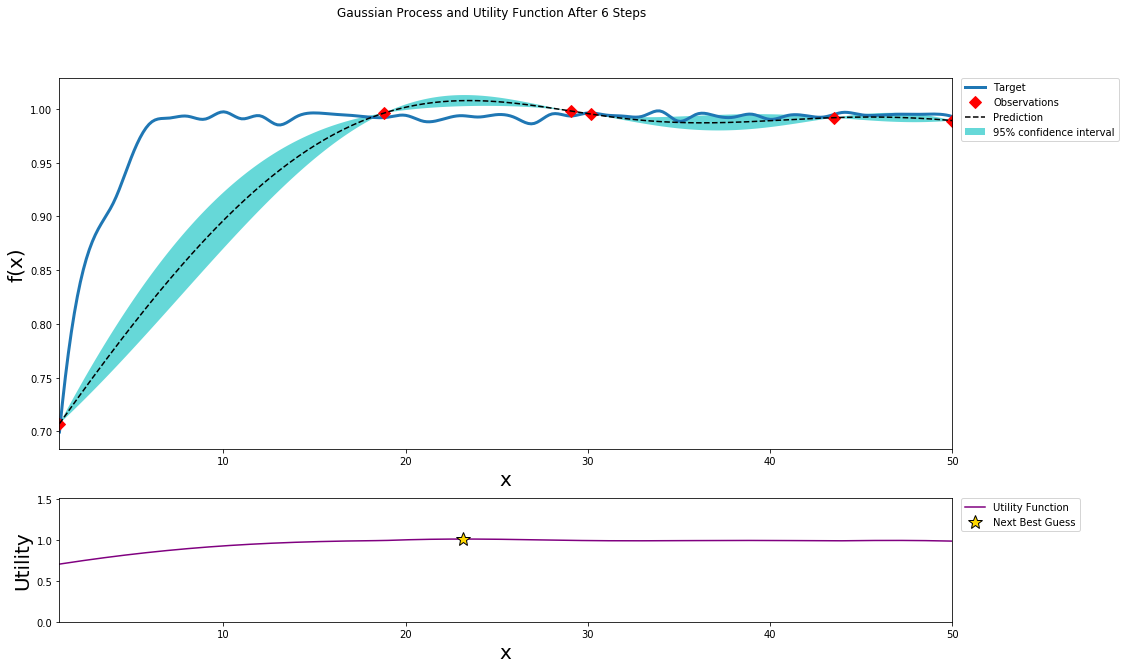

In [313]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
    7 | 00m08s |    0.99114 |   23.1833 | 


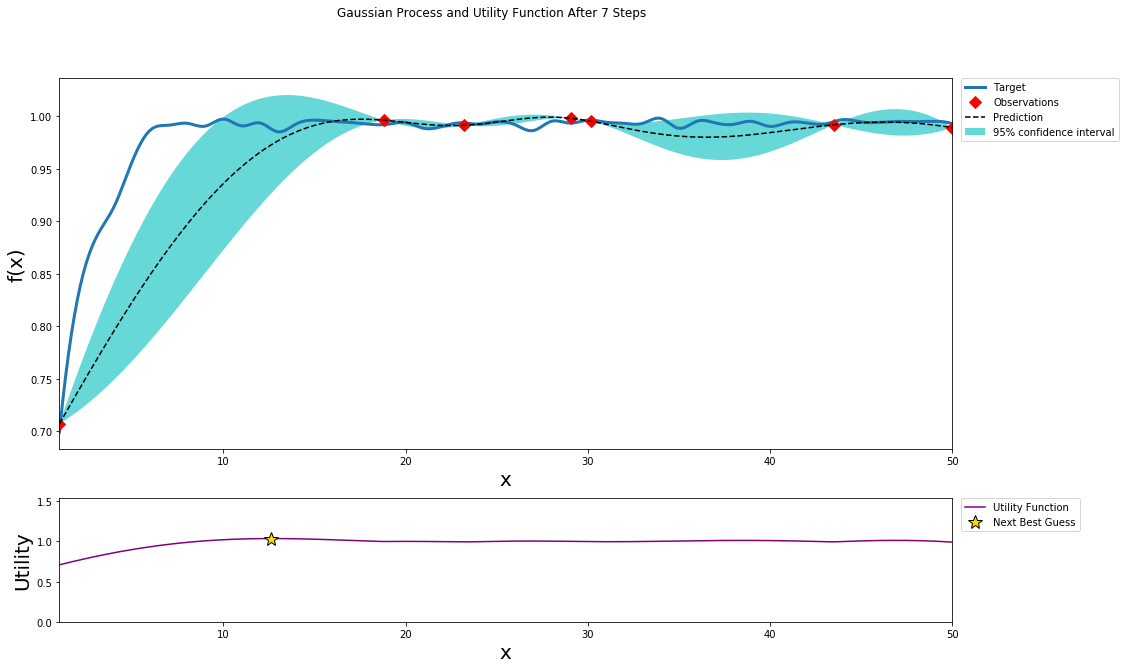

In [314]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
    8 | 00m08s |    0.99293 |   12.6806 | 


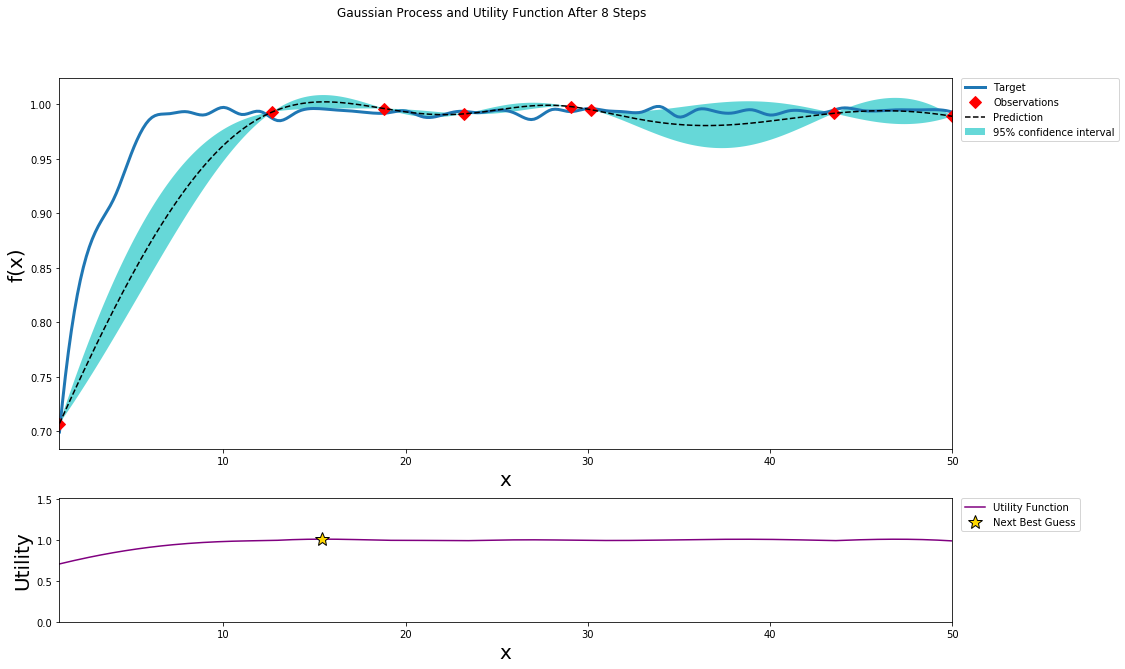

In [315]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
    9 | 00m08s |    0.99674 |   15.4666 | 


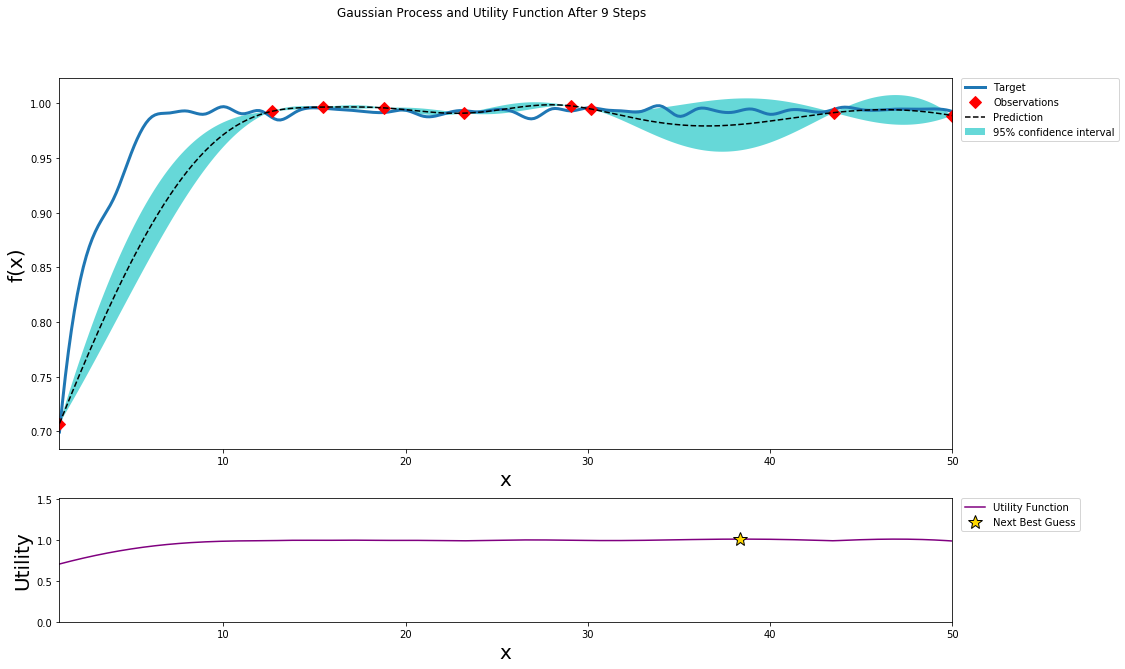

In [316]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.5313511e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   10 | 00m08s |    0.99467 |   38.4248 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5.78950821e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


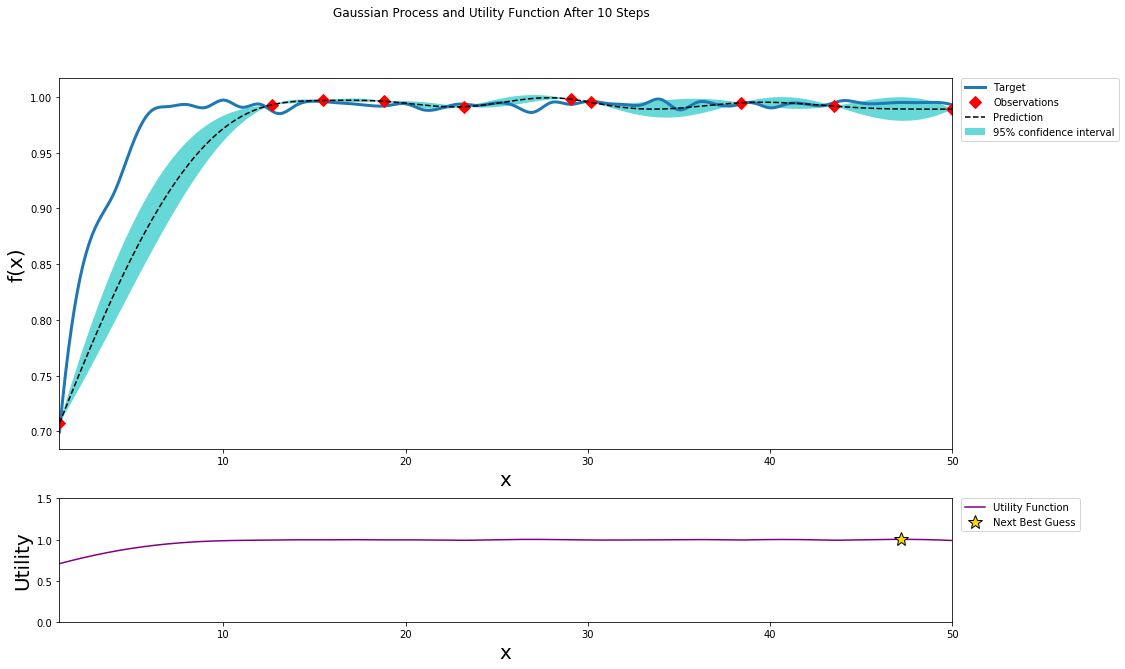

In [317]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   11 | 00m08s |    0.99667 |   47.1906 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


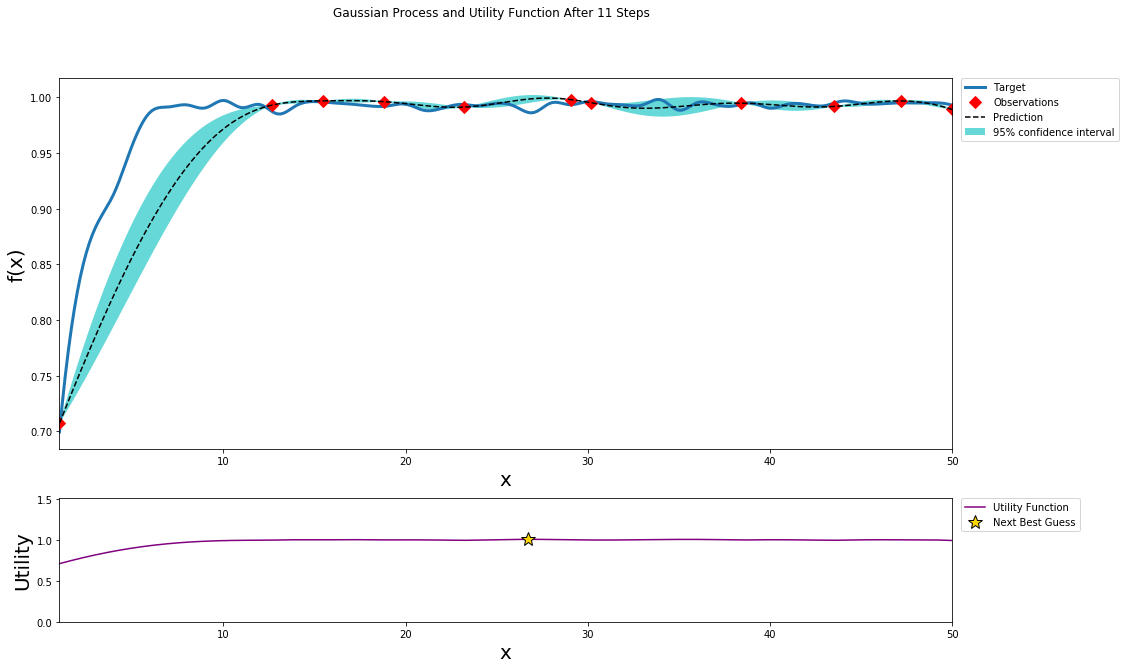

In [318]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   12 | 00m10s |    0.98971 |   26.8110 | 


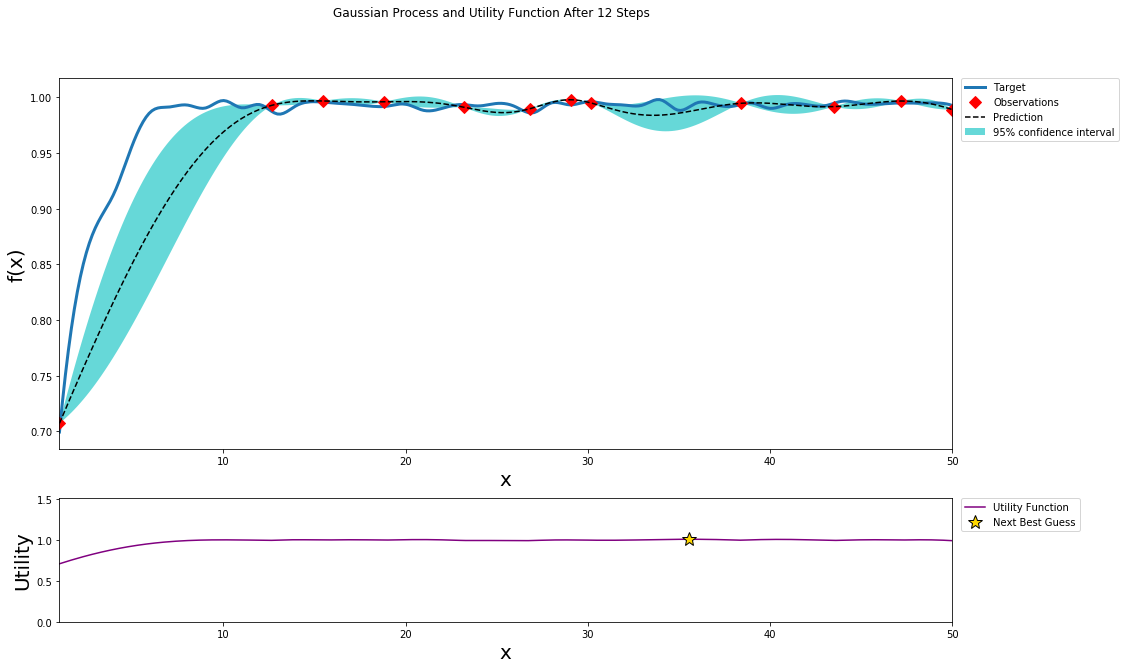

In [319]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   13 | 00m10s |    0.99461 |   35.5848 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.84245304e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


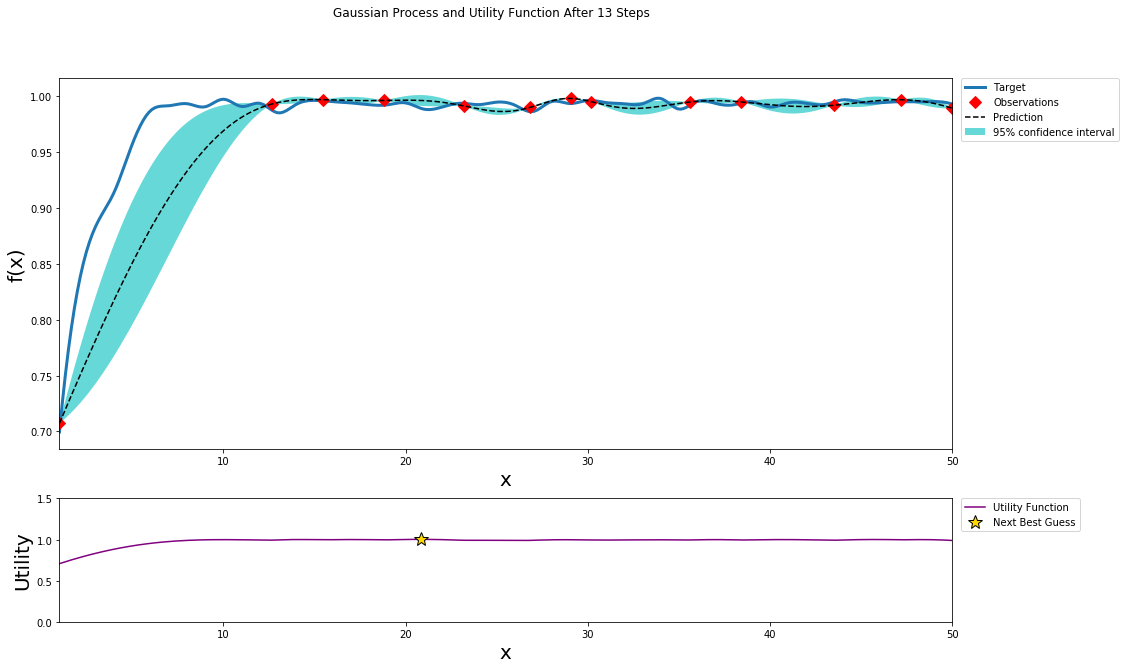

In [320]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   14 | 00m12s |    0.99335 |   20.8077 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00021197]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


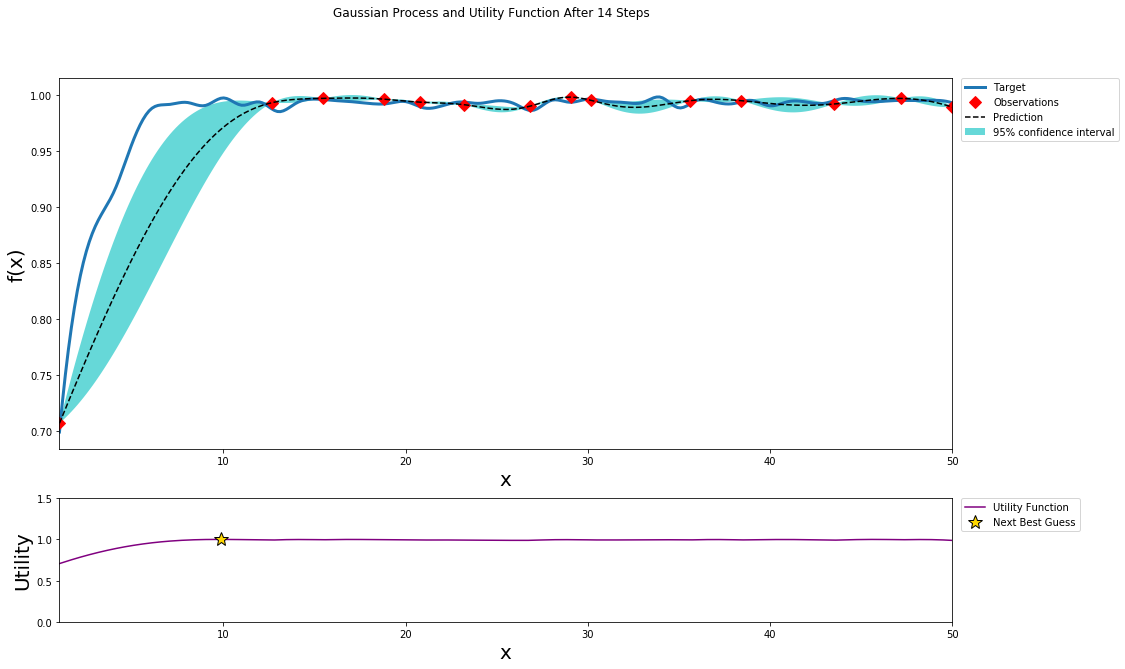

In [321]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   15 | 00m10s |    0.99265 |    9.7664 | 


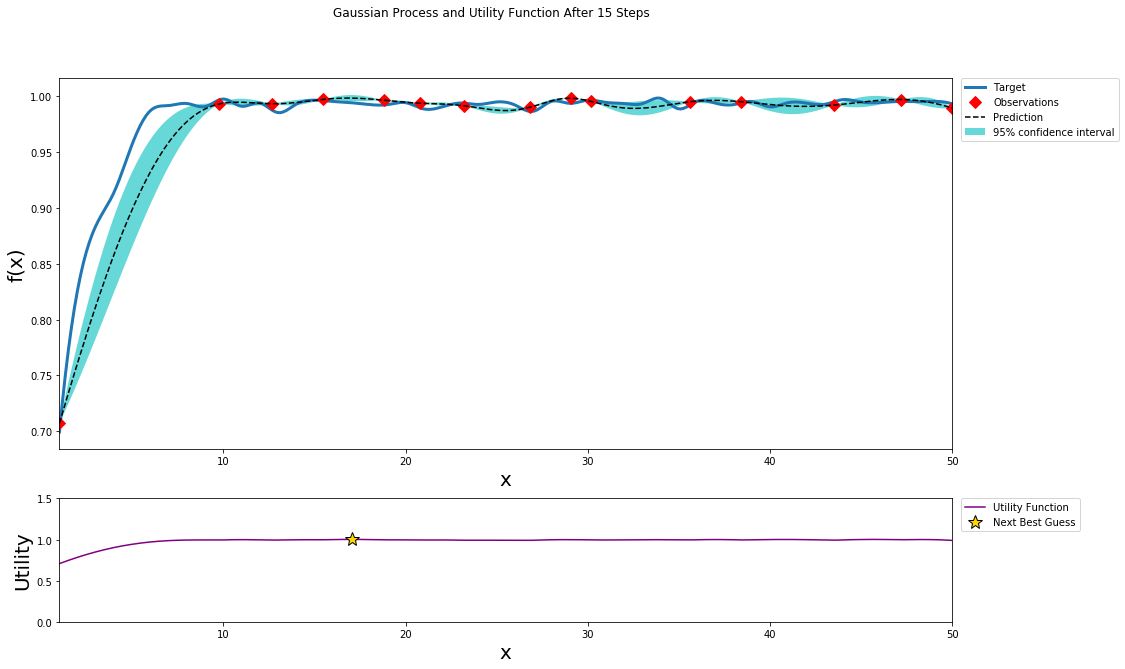

In [322]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   16 | 00m10s |    0.99564 |   17.0183 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00020879]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


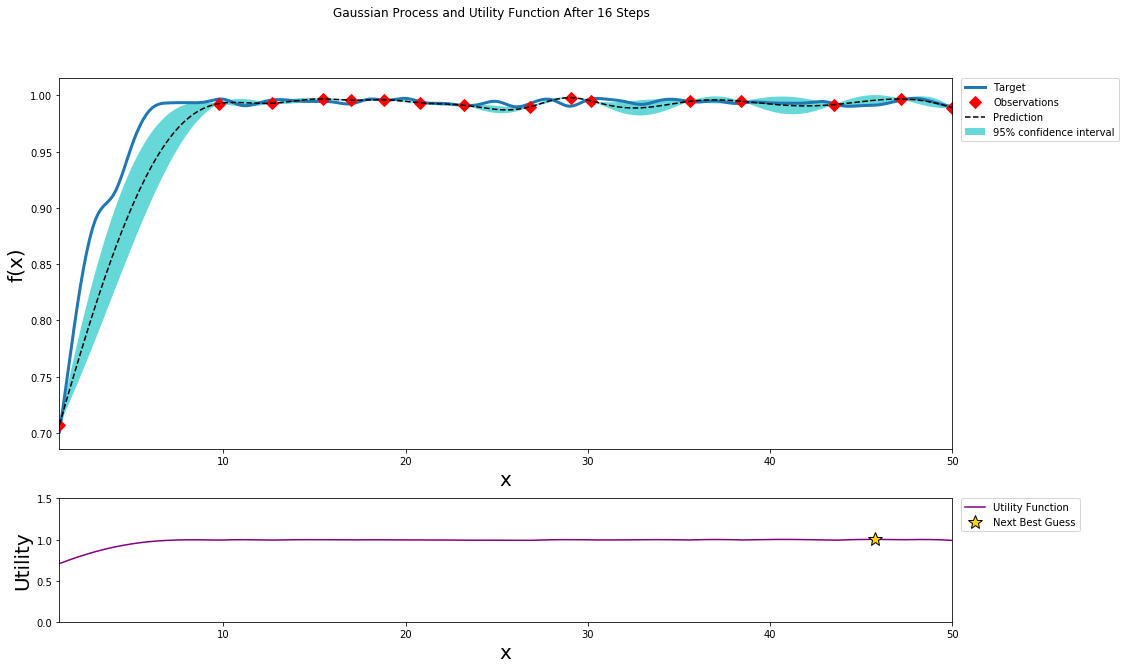

In [324]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   17 | 00m11s |    0.99726 |   45.6676 | 


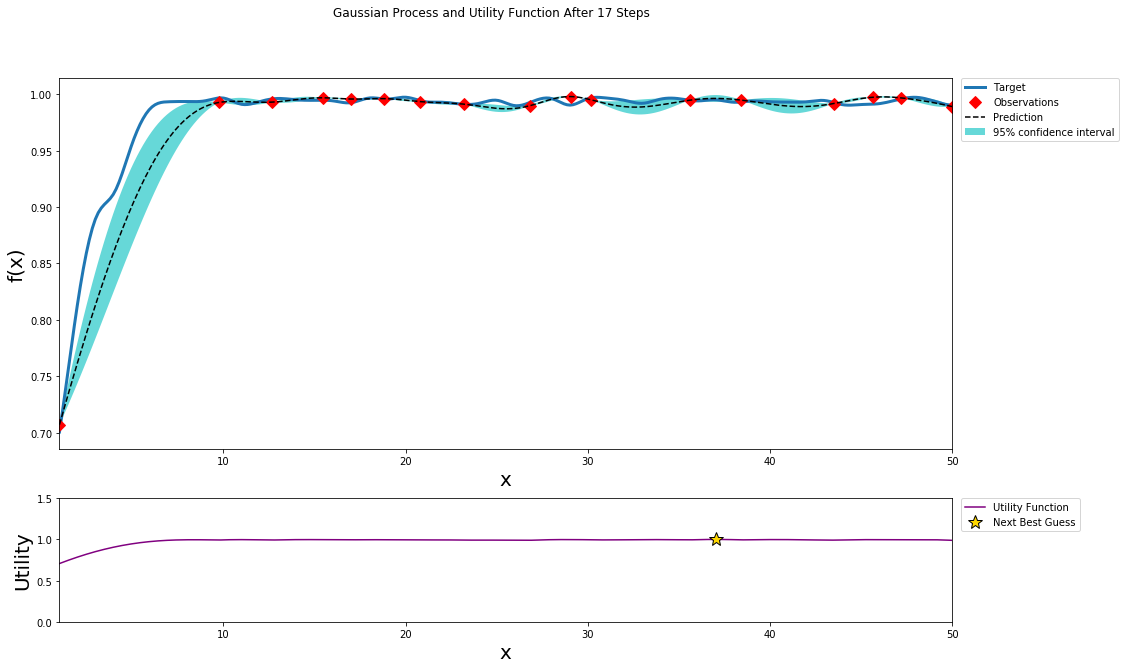

In [325]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   18 | 00m13s |    0.99352 |   37.0001 | 


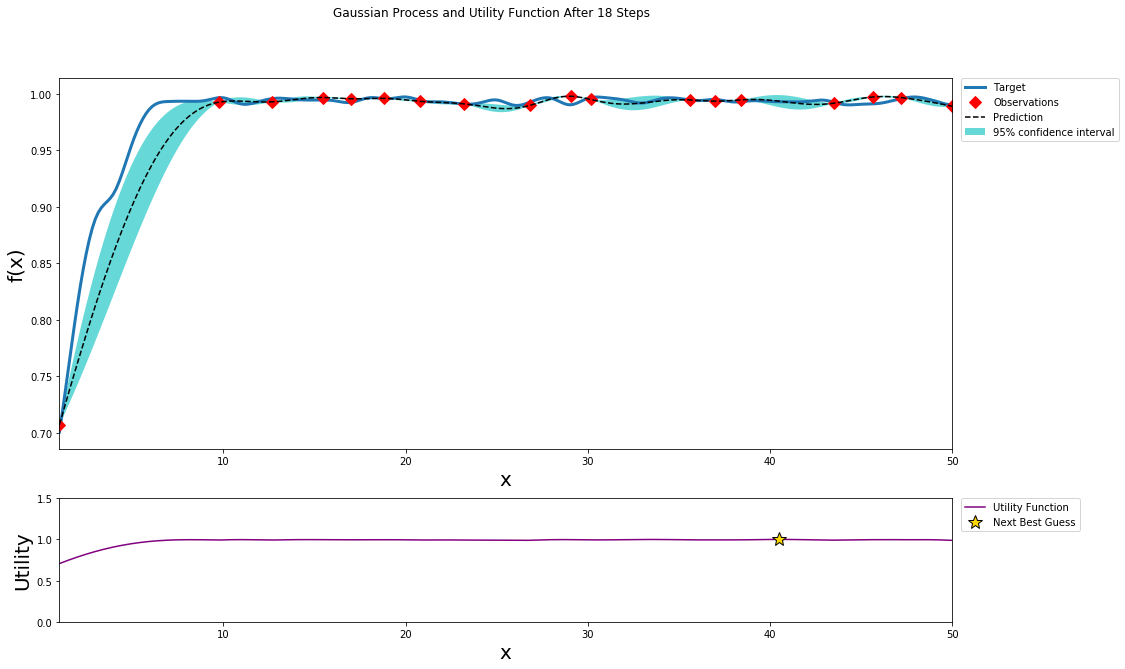

In [326]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         n | 
   19 | 00m10s |    0.98907 |   40.5044 | 


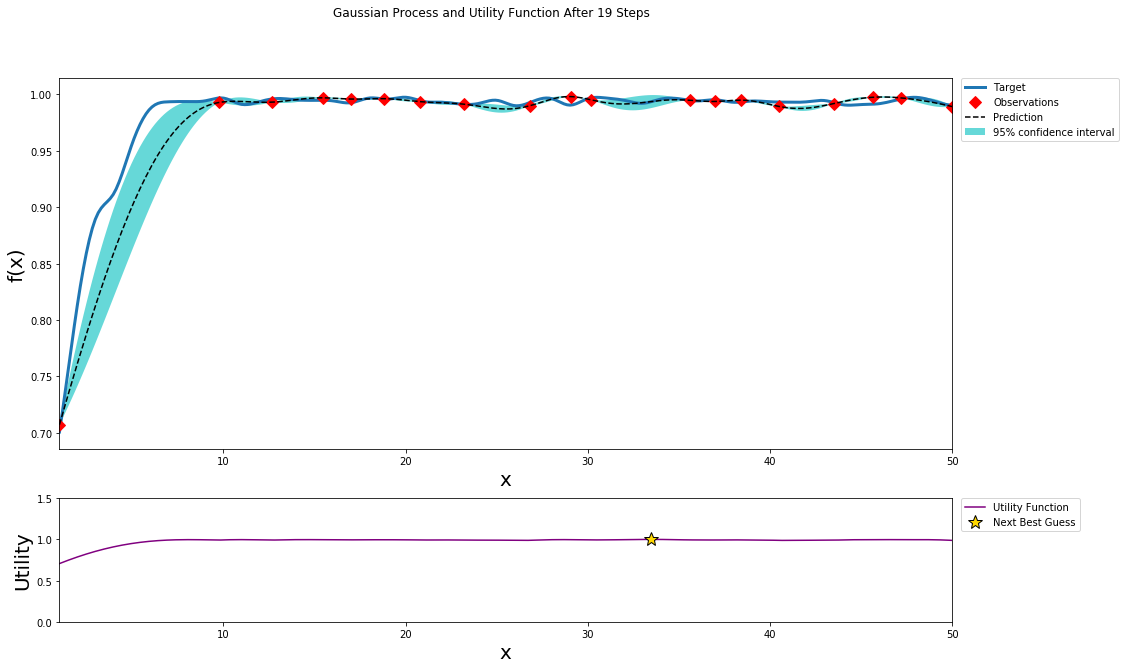

In [327]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

In [328]:
print(bo.res['max'])

{'max_val': 0.9977985690698954, 'max_params': {'n': 29.087295522606926}}
